Following https://carpentries-incubator.github.io/geospatial-python/aio/index.html

In [20]:
import xarray
import rioxarray
from matplotlib.colors import ListedColormap
import earthpy.plot as ep

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [6]:
terrain_SJER = rioxarray.open_rasterio("SJER/DTM/SJER_dtmCrop.tif", 
                                       masked=True)

In [7]:
surface_SJER = rioxarray.open_rasterio("SJER/DSM/SJER_dsmCrop_WGS84.tif", 
                                       masked=True)

In [10]:
reprojected_surface_model = surface_SJER.rio.reproject(dst_crs=terrain_SJER.rio.crs)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

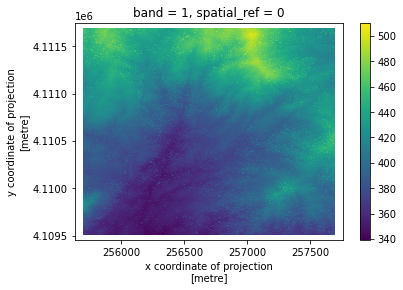

In [13]:
reprojected_surface_model.plot()

In [15]:
terrain_SJER_matched = terrain_SJER.rio.reproject_match(surface_SJER)

In [16]:
canopy_SJER = reprojected_surface_model - terrain_SJER_matched
canopy_SJER.compute()

<xarray.DataArray (band: 1, y: 1479, x: 1761)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * y            (y) float64 4.112e+06 4.112e+06 ... 4.109e+06 4.109e+06
  * x            (x) float64 2.556e+05 2.556e+05 ... 2.578e+05 2.578e+05
  * band         (band) int64 1
    spatial_ref  int64 0

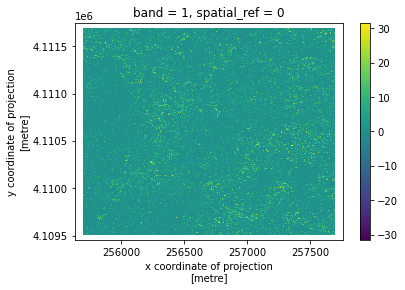

In [17]:
canopy_SJER.plot(cmap="viridis")

Text(0.5, 1.0, 'Histogram of Canopy Height in Meters')

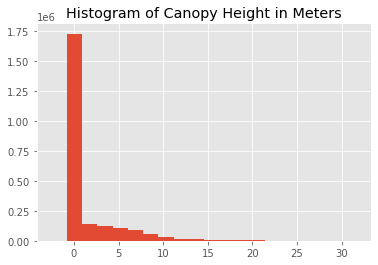

In [24]:
plt.figure()
plt.style.use('ggplot') # adds a style to improve the aesthetics
canopy_SJER.plot.hist(bins=20)
plt.title("Histogram of Canopy Height in Meters")

In [26]:
canopy_SJER.min().values

array(-2.47000122)

In [28]:
canopy_SJER.max().values

array(31.60998535)

In [31]:
class_bins = [canopy_SJER.min().values, 2, 10, 20, np.inf]

In [32]:
height_colors = ["gray", "y", "yellowgreen", "g", "darkgreen"]
height_cmap = ListedColormap(height_colors)

In [33]:
category_names = [
    "No Vegetation",
    "Bare Area",
    "Low Canopy",
    "Medium Canopy",
    "Tall Canopy",
]

In [34]:
category_indices = list(range(len(category_names)))

In [36]:
canopy_height_classified = xarray.apply_ufunc(
    np.digitize,  # func to run across the input array
    canopy_SJER,  # func arg 1 (the array that needs to be classified)
    class_bins    # func arg 2 (the classification bins)
)

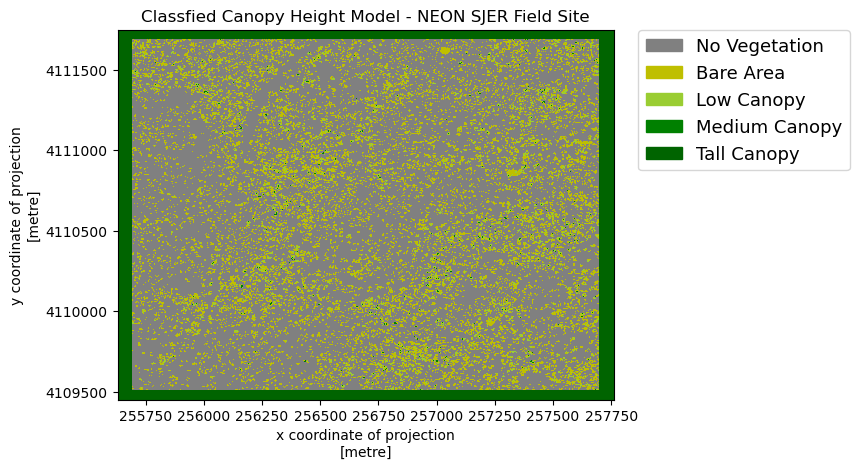

In [38]:
plt.style.use("default")
plt.figure()
im = canopy_height_classified.plot(cmap=height_cmap, add_colorbar=False)
ep.draw_legend(im_ax=im, classes = category_indices, titles=category_names)
plt.title("Classfied Canopy Height Model - NEON SJER Field Site")
plt.ticklabel_format(style="plain")